# Interactive Plotting of covariances

## Initializations

In [9]:
%matplotlib widget



Use `%matplotlib qt` if you want seperate windows for plots

`%matplotlib notebook` might work if using the jupyter notebook in a browser, but doesn't work in vscode

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, widgets


## Load Data

Here I am loading data for the MS, but the filepaths need to be adapted to wherever your files are

In [11]:
# Adapt this to the file directories you have

dir_ms="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/"
dir_takahashi="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/Takahashi/"
dir_slics="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/"


datatype="ms"#"ms" #"ms" #"ms"#"takahashi"

if datatype=="ms":
    cov_fft=np.loadtxt(dir_ms+"cov_MS_fft_sigma_0.00_n_1048576.00_thetaMax_1.87.dat")
    cov_T1inf=np.loadtxt(dir_ms+"cov_infinite_term1Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    cov_T2=np.loadtxt(dir_ms+"cov_square_term2Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    cov_T4=np.loadtxt(dir_ms+"cov_infinite_term4Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    cov_T5=np.loadtxt(dir_ms+"cov_infinite_term5Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    cov_T6=np.loadtxt(dir_ms+"cov_square_term6Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    cov_T7=np.loadtxt(dir_ms+"cov_infinite_term7Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    map3=np.loadtxt(dir_ms+"map_cubed")

    
elif datatype=="takahashi":
    cov_fft=np.load(dir_takahashi+"Map_cov_euclid.npy")
    cov_T1inf=np.loadtxt(dir_takahashi+"cov_infinite_term1Numerical_sigma_0.37_n_107987.71_thetaMax_120.88_gpu.dat")
    cov_T2=np.loadtxt(dir_takahashi+"cov_square_term2Numerical_sigma_0.37_n_107987.71_thetaMax_120.88_gpu.dat")
    cov_T4=np.loadtxt(dir_takahashi+"cov_infinite_term4Numerical_sigma_0.37_n_107987.71_thetaMax_120.88_gpu.dat")
    cov_T5=np.loadtxt(dir_takahashi+"cov_infinite_term5Numerical_sigma_0.37_n_107987.71_thetaMax_120.88_gpu.dat")
    cov_T6=np.loadtxt(dir_takahashi+"cov_square_term6Numerical_sigma_0.37_n_107987.71_thetaMax_120.88_gpu.dat")
    #cov_T7=np.loadtxt(dir_takahashi+"cov_infinite_term7Numerical_sigma_0.37_n_107987.71_thetaMax_120.88_gpu.dat")
    map3=np.loadtxt(dir_takahashi+"map_cubed")

    #cov_fft=np.zeros_like(cov_T1inf)
    #cov_T4=np.zeros_like(cov_T1inf)
    #cov_T6=np.zeros_like(cov_T1inf)
    cov_T7=np.zeros_like(cov_T1inf)


elif datatype=="slics":
    cov_fft=np.loadtxt(dir_slics+"cov_SLICS_fft_sigma_0.37_n_108000.00_thetaMax_7.87.dat")
    cov_T1inf=np.loadtxt(dir_slics+"cov_infinite_term1Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
    cov_T2=np.loadtxt(dir_slics+"cov_square_term2Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
    cov_T4=np.loadtxt(dir_slics+"cov_infinite_term4Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
    cov_T5=np.loadtxt(dir_slics+"cov_infinite_term5Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
    #cov_T6=np.loadtxt(dir_slics+"cov_square_term6Numerical_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
    #cov_T7=np.loadtxt(dir_slics+"cov_infinite_term7Numerical_sigma_0.37_n_107987.71_thetaMax_120.88_gpu.dat")
    map3=np.loadtxt(dir_slics+"map_cubed")

    #cov_fft=np.zeros_like(cov_T1inf)
    #cov_T4=np.zeros_like(cov_T1inf)
    cov_T6=np.zeros_like(cov_T1inf)
    cov_T7=np.zeros_like(cov_T1inf)

map3_mean=np.mean(map3, axis=0)
map3_outer=np.outer(map3_mean, map3_mean)



## Plot Covariance as Lineplot

In the next cell I am setting a list with the independent theta combinations for aperture radii between 2' and 16'. This is useful for the axis-labelling in the plot.

In [12]:
# Set Thetas labels
thetas_ind = np.array([[2, 2, 2], [2, 2, 4], [2, 2, 8], [2, 2, 16],
                       [2, 4, 4], [2, 4, 8], [2, 4, 16], [2, 8, 8],
                       [2, 8, 16], [2, 16, 16], [4, 4, 4], [4, 4, 8],
                       [4, 4, 16], [4, 8, 8], [4, 8, 16], [4,16,16],
                       [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

Now I am finally ready to plot! 

The first part of the cell creates a dummy plot, using only the first line of each covariance. 

The function `updateCov` is called each time we change a slider / toggle box in the plot. It updates the displayed data. If we don't want to see a certain line, its values are set to NaNs.

The final part is the function `interact` that is responsible for the interactivity.

interactive(children=(IntSlider(value=9, description='bin_ix', max=19), Checkbox(value=True, description='plot…

<function __main__.updateCov(bin_ix, plotFFT=True, plotT1=False, plotT2=False, plotT4=False, plotT5=False, plotT6=False, plotT7=False, plotSum=True)>

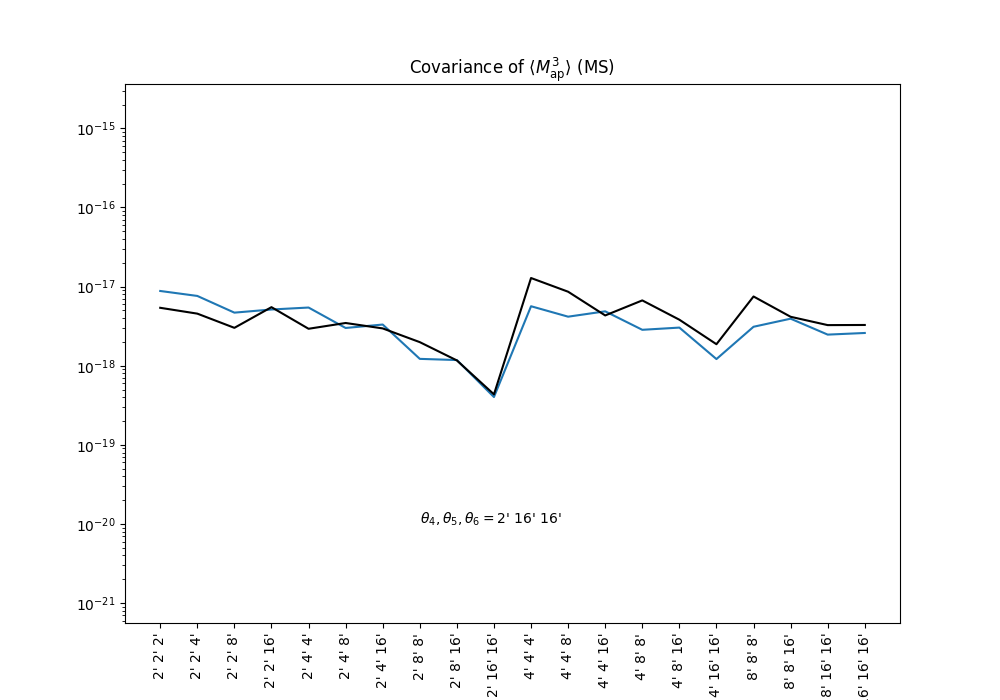

In [31]:
a=0#1.0/2/np.pi#/500#1/2/np.pi/2#1/3000#2*np.pi#*2#*500
b=1


fig, ax=plt.subplots(figsize=(10,7))

ax.set_yscale('log')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)

if datatype=="ms":
    ax.set_title(r"Covariance of $\langle M_\mathrm{ap}^3\rangle$ (MS)")
elif datatype=="takahashi":
    ax.set_title(r"Covariance of $\langle M_\mathrm{ap}^3\rangle$ (Takahashi)")
elif datatype=="slics":
    ax.set_title(r"Covariance of $\langle M_\mathrm{ap}^3\rangle$ (SLICS)")

ax.set_xlabel(r"$\theta_1, \theta_2, \theta_3$")
thetaText=ax.text(N/2-3, 1e-20, r"$\theta_4, \theta_5, \theta_6=$"+thetas_labels[0])
line,=ax.plot(cov_fft[0], label='FFT')
T1,=ax.plot(cov_T1inf[0], label='T1', ls='--')
T2,=ax.plot(cov_T1inf[0], label='T2', ls='--')
T4,=ax.plot(b*cov_T1inf[0], label=f'{b:.1f}*T4', ls='--')
T5,=ax.plot(cov_T1inf[0], label='T5', ls='--')
T6,=ax.plot(cov_T1inf[0], label='T6', ls='--')
T7,=ax.plot(cov_T1inf[0], label='T7', ls='--')
Map3_outer,=ax.plot(map3_outer[0]*a, label=r'$\langle M_\mathrm{ap}^3 \rangle \langle M_\mathrm{ap}^3\rangle$'+r'$\times{:.1e}$'.format(a))
Sum,=ax.plot(cov_T1inf[0]+map3_outer[0]*a, label=r'Sum of analytical terms + $\langle M_\mathrm{ap}^3 \rangle \langle M_\mathrm{ap}^3\rangle$'+r'$\times{:.1e}$'.format(a), color='k')
#fig.legend(loc="lower right")

sumCovs=cov_T1inf+cov_T2+b*cov_T4+cov_T5+cov_T6+cov_T7+map3_outer*a

def updateCov(bin_ix, plotFFT=True, plotT1=False, plotT2=False, plotT4=False, plotT5=False, plotT6=False, plotT7=False, plotSum=True):
    thetaText.set_text(r"$\theta_4, \theta_5, \theta_6=$"+thetas_labels[bin_ix])
    Map3_outer.set_ydata(map3_outer[bin_ix]*a)
    if(plotFFT):
        line.set_ydata(cov_fft[bin_ix])
    else:
        line.set_ydata(np.nan*np.ones_like(cov_fft[bin_ix]))

    if(plotT1):
        T1.set_ydata(cov_T1inf[bin_ix])
    else:
        T1.set_ydata(np.nan*np.ones_like(cov_T1inf[bin_ix]))

    if(plotT2):
        T2.set_ydata(cov_T2[bin_ix])
    else:
        T2.set_ydata(np.nan*np.ones_like(cov_T2[bin_ix]))

    if(plotT4):
        T4.set_ydata(b*cov_T4[bin_ix])
    else:
        T4.set_ydata(np.nan*np.ones_like(cov_T4[bin_ix]))
    if(plotT5):
        T5.set_ydata(cov_T5[bin_ix])
    else:
        T5.set_ydata(np.nan*np.ones_like(cov_T5[bin_ix]))
    if(plotT6):
        T6.set_ydata(cov_T6[bin_ix])
    else:
        T6.set_ydata(np.nan*np.ones_like(cov_T6[bin_ix]))
    if(plotT7):
        T7.set_ydata(cov_T7[bin_ix])
    else:
        T7.set_ydata(np.nan*np.ones_like(cov_T7[bin_ix]))

    
    if(plotSum):
        Sum.set_ydata(sumCovs[bin_ix])
    else:
        Sum.set_ydata(np.nan*np.ones_like(sumCovs[bin_ix]))

    fig.canvas.draw_idle()



interact(updateCov, bin_ix=(0, N-1))
